<a href="https://colab.research.google.com/github/Tisks/Covid-Big-Data/blob/master/Grafico_mundial_subplot_HumData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importar datasets

JHK_conf=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', sep= ',')
JHK_dead=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', sep= ',')
JHK_recov=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv', sep= ',')

HUM_conf=pd.read_csv('http://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_iso3_regions.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&merge-replace02=on&merge-overwrite02=on&tagger-match-all=on&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv', sep=',')
HUM_dead=pd.read_csv('http://data.humdata.org/hxlproxy/data/download/time_series_covid19_deaths_global_iso3_regions.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&merge-replace02=on&merge-overwrite02=on&tagger-match-all=on&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv', sep=',')
HUM_recov=pd.read_csv('http://data.humdata.org/hxlproxy/data/download/time_series_covid19_recovered_global_iso3_regions.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&merge-replace02=on&merge-overwrite02=on&tagger-match-all=on&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv', sep=',')

In [ ]:
#funcion primera limpieza de datos (datos de JHK)
def limp_JHK(df):
    #limpiar columnas que no sirven
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)    
    return df

In [ ]:
#funcion primera limpieza de datos (datos de HUMData)
def limp_HUM(df):
    #limpiar columnas que no sirven y primera fila
    df= df.drop(['Province/State', 'Lat', 'Long','Intermediate Region Name','ISO 3166-1 Alpha 3-Codes','Region Code','Region Name','Sub-region Code','Sub-region Name','Intermediate Region Code'], axis=1)
    df= df.drop([0], axis=0)
    return df

In [ ]:
#funcion top 10 afectados
def top10(df):
    #elimina columnas hasta dejar solo el ultimo 
    dates=df.columns
    df0 = df.drop(columns=dates[1:-1], axis=1)
    #ordenar de mayor a menor por cantidad de contagiados
    df0=df0.sort_values(by=dates[-1],ascending=False)
    #mostrar solo primeros 10
    df0=df0.head(10)
    return df0

In [ ]:
#datos por paises, df=top10, df0=data limpia
def datTop10(df,df0):
    #lista con los 10 paises
    lis=[]
    for paises in df['Country/Region']:
        lis.append(paises)

    #subframe todos los datos para los 10 peores paises
    top10casos=pd.DataFrame()
    for i in lis:
        df00 = df0.drop(df0[df0['Country/Region']!=i].index)
        top10casos = pd.concat([top10casos, df00], axis=0)
    #eliminar duplicados que quedan del for
    top10casos.drop_duplicates(keep=False)
    top10casos=top10casos.groupby('Country/Region').sum()
    dates=top10casos.columns
    top10casos=top10casos.sort_values(by=dates[-1],ascending=False)
    return top10casos

In [ ]:
#funcion para preparar datos para graficar
def prePlot(df):
    df=df.rename_axis('Country')
    df=df.rename_axis('Country').rename_axis('Dates', axis='columns')
    df=df.T
    df.index=pd.to_datetime(df.index)
    return df

In [ ]:
#Datos de John Hopkins
cJHK_conf=limp_JHK(JHK_conf)
cJHK_dead=limp_JHK(JHK_dead)
cJHK_recov=limp_JHK(JHK_recov)

JHKtopconf=top10(cJHK_conf)
JHKtopdead=top10(cJHK_dead)
JHKtoprecov=top10(cJHK_recov)

JHKdat10conf=datTop10(JHKtopconf,cJHK_conf)
JHKdat10dead=datTop10(JHKtopdead,cJHK_dead)
JHKdat10recov=datTop10(JHKtoprecov,cJHK_recov)

JHKplotconf=prePlot(JHKdat10conf)
JHKplotdead=prePlot(JHKdat10dead)
JHKplotrecov=prePlot(JHKdat10recov)

#Datos HumData
cHUM_conf=limp_HUM(HUM_conf)
cHUM_dead=limp_HUM(HUM_dead)
cHUM_recov=limp_HUM(HUM_recov)

HUMtopconf=top10(cHUM_conf)
HUMtopdead=top10(cHUM_dead)
HUMtoprecov=top10(cHUM_recov)

HUMdat10conf=datTop10(HUMtopconf,cHUM_conf)
HUMdat10dead=datTop10(HUMtopdead,cHUM_dead)
HUMdat10recov=datTop10(HUMtoprecov,cHUM_recov)

HUMplotconf=prePlot(HUMdat10conf)
HUMplotdead=prePlot(HUMdat10dead)
HUMplotrecov=prePlot(HUMdat10recov)

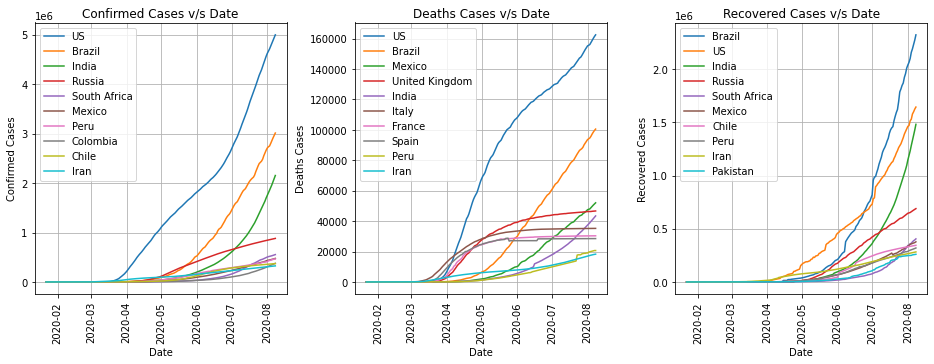

In [ ]:
#subplots John Hopkins
fig = plt.figure(figsize=(16,5)) 
fig.subplots_adjust(wspace=0.27)

plt.subplot(1,3,1)
plt.plot(JHKplotconf)
plt.grid()
plt.title('Confirmed Cases v/s Date')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend((JHKplotconf.columns))

plt.subplot(1,3,2)
plt.subplots_adjust(hspace=2)
plt.plot(JHKplotdead)
plt.grid()
plt.title('Deaths Cases v/s Date')
plt.ylabel('Deaths Cases')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend((JHKplotdead.columns))

plt.subplot(1,3,3)
plt.subplots_adjust(hspace=2)
plt.plot(JHKplotrecov)
plt.grid()
plt.title('Recovered Cases v/s Date')
plt.ylabel('Recovered Cases')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend((JHKplotrecov.columns))

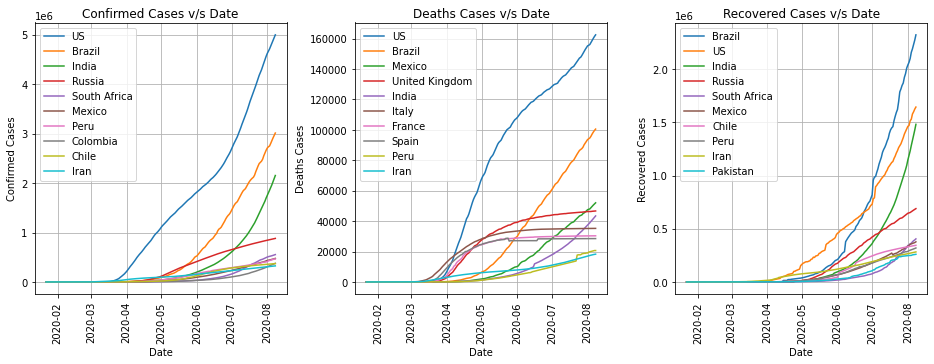

In [ ]:
#subplots HumData
fig = plt.figure(figsize=(16,5)) 
fig.subplots_adjust(wspace=0.27)

plt.subplot(1,3,1)
plt.plot(HUMplotconf)
plt.grid()
plt.title('Confirmed Cases v/s Date')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend((HUMplotconf.columns))

plt.subplot(1,3,2)
plt.subplots_adjust(hspace=2)
plt.plot(HUMplotdead)
plt.grid()
plt.title('Deaths Cases v/s Date')
plt.ylabel('Deaths Cases')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend((HUMplotdead.columns))

plt.subplot(1,3,3)
plt.subplots_adjust(hspace=2)
plt.plot(HUMplotrecov)
plt.grid()
plt.title('Recovered Cases v/s Date')
plt.ylabel('Recovered Cases')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend((HUMplotrecov.columns))

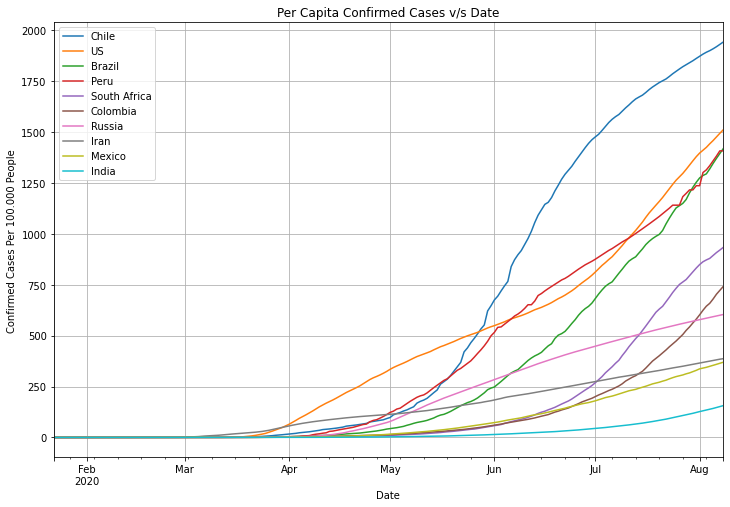

In [36]:
#cases per 100,000 people for top 10 countrys at 8/8/2020
pob = {'US':331002647, 'Brazil': 212559409 , 'India': 1380004385 , 'Russia': 145934460, 'South Africa': 59308690, 'Mexico': 128932753, 'Peru' : 32971846, 'Colombia': 50882884, 'Chile' : 19116209, 'Iran' : 83992953}
percapita = JHKplotconf.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/pob[country]*100000
Dates=percapita.index
percapita=percapita.sort_values(by=Dates[-1],axis=1,ascending=False)

#Plot
grafico = percapita.plot(figsize=(12,8))
plt.grid()
plt.title('Per Capita Confirmed Cases v/s Date')
plt.ylabel('Confirmed Cases Per 100.000 People')
plt.xlabel('Date')
plt.legend(percapita.columns)

plt.show()

#population: https://www.populationpyramid.net/es/poblaci%C3%B3n-por-pais/2020/